In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Part 1: Getting the Data
## get SVEN's portfolio




In [2]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db
)

from myauz.myalpha_libs_universal import StocksDb



In [3]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "DHR",
   "GOOG",
   "AMZN",
   "AAPL",
   "ATR",
   "CSCO",
   "CL",
   "EMR",
   "HEINY",
   "HXGBY",
   "LDSVF",
   "MCD",
   "MSFT",
   "NVS",
   "NVZMY",
]




alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha, alphaDB.path)
print("\n\n")
api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
read_from_alphavantage = False
rename_column = True


from datetime import date
import datetime
import pandas as pd

usecols = ["timestamp", "adjusted_close"]
startd = "2020-01-01"
endd = "2020-08-30"
path_list = create_path_list(symbol_list, root_path)
print(path_list)

Directory  ../data  already exists

 77K8XPSR3XWWZJ80 ..



{'DHR': '../data/DHR/daily_DHR.csv', 'GOOG': '../data/GOOG/daily_GOOG.csv', 'AMZN': '../data/AMZN/daily_AMZN.csv', 'AAPL': '../data/AAPL/daily_AAPL.csv', 'ATR': '../data/ATR/daily_ATR.csv', 'CSCO': '../data/CSCO/daily_CSCO.csv', 'CL': '../data/CL/daily_CL.csv', 'EMR': '../data/EMR/daily_EMR.csv', 'HEINY': '../data/HEINY/daily_HEINY.csv', 'HXGBY': '../data/HXGBY/daily_HXGBY.csv', 'LDSVF': '../data/LDSVF/daily_LDSVF.csv', 'MCD': '../data/MCD/daily_MCD.csv', 'MSFT': '../data/MSFT/daily_MSFT.csv', 'NVS': '../data/NVS/daily_NVS.csv', 'NVZMY': '../data/NVZMY/daily_NVZMY.csv'}


In [4]:
# refresh_db(root_path, api_key_alpha, symbol_list, False)
refresh_db(root_path,api_key_alpha,symbol_list,False)





processing symbol: MSFT
('last stock-date available from alpha_vantage:', '2020-08-28')
('Directory ', '../data/MSFT', ' already exists')
('number of entries we need to append to csv:', 0)
retrieving head data from csv
nothing to append

processing symbol: NVS
('last stock-date available from alpha_vantage:', '2020-08-28')
('Directory ', '../data/NVS', ' already exists')
('number of entries we need to append to csv:', 80)
retrieving head data from csv
the final csv to be updated
('Directory ', '../data/NVS', ' already exists')

processing symbol: NVZMY
('last stock-date available from alpha_vantage:', '2020-08-28')
('Directory ', '../data/NVZMY', ' already exists')
('number of entries we need to append to csv:', 80)
retrieving head data from csv
the final csv to be updated
('Directory ', '../data/NVZMY', ' already exists')


In [5]:
#import csv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX


In [9]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "adjusted_close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 

                 DHR     GOOG     AMZN      AAPL       ATR     CSCO       CL  \
2020-01-02  154.7471  1367.37  1898.01  298.8389  112.6190  47.6103  66.9124   
2020-01-03  153.7893  1360.66  1874.97  295.9336  112.9756  46.8335  66.8141   
2020-01-06  154.2483  1394.21  1902.88  298.2917  112.9855  47.0007  67.2758   
2020-01-07  155.7647  1393.34  1906.86  296.8888  111.8562  46.6959  66.3525   
2020-01-08  155.9243  1404.32  1891.97  301.6647  112.1633  46.7254  68.0420   
...              ...      ...      ...       ...       ...      ...      ...   
2020-08-24  205.5600  1588.20  3307.46  503.4300  119.1100  42.1800  79.1300   
2020-08-25  207.5700  1608.22  3346.49  499.3000  118.1300  41.9600  78.5900   
2020-08-26  208.1900  1652.38  3441.85  506.0900  118.6000  42.2500  78.6500   
2020-08-27  204.3900  1634.33  3400.00  500.0400  120.0500  42.2900  79.0600   
2020-08-28  205.6400  1644.41  3401.80  499.2300  118.1300  42.2000  79.3700   

                EMR    HEINY   HXGBY   

In [10]:
### create dataframe with volumes of portfolio
usecols = ["timestamp", "volume"]
pf_vol = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf_vol)

                  DHR     GOOG     AMZN      AAPL     ATR      CSCO       CL  \
2020-01-02  2585100.0  1406731  4035910  33911864  362700  16710076  3441800   
2020-01-03  2329043.0  1187006  3766604  36633878  221500  15587707  3473800   
2020-01-06  2747987.0  1733149  4065698  29644644  282400  22185267  4606000   
2020-01-07  1987168.0  1511693  4134010  27877655  234700  16566640  4500000   
2020-01-08  2788122.0  1529177  3511966  33090946  331000  25181655  4676100   
...               ...      ...      ...       ...     ...       ...      ...   
2020-08-24  1226870.0  1410229  4666258  86484442  223991  17742932  2796823   
2020-08-25  1449040.0  2132084  3992842  52873947  114372  15417363  2374145   
2020-08-26  1140998.0  3581072  6508743  40755567  119970  21625828  3476828   
2020-08-27  2551303.0  1861602  4264795  38888096  209790  22456772  2208925   
2020-08-28  1387082.0  1499782  2896978  46907479  295204  16573581  3039773   

                EMR   HEINY  HXGBY  LDS

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

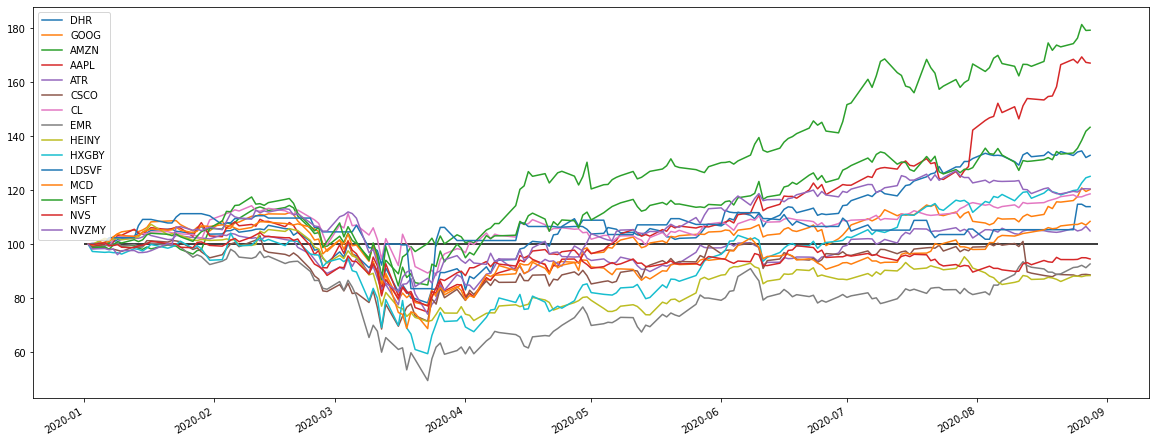

In [15]:
pf.iloc[0]
(pf / pf.iloc[0] * 100).plot(figsize=(20, 8))
plt.hlines(100, startd,endd,colors='black', linestyles='solid')
plt.legend(loc=2);

____

** Plot the Volume of stock traded each day.**

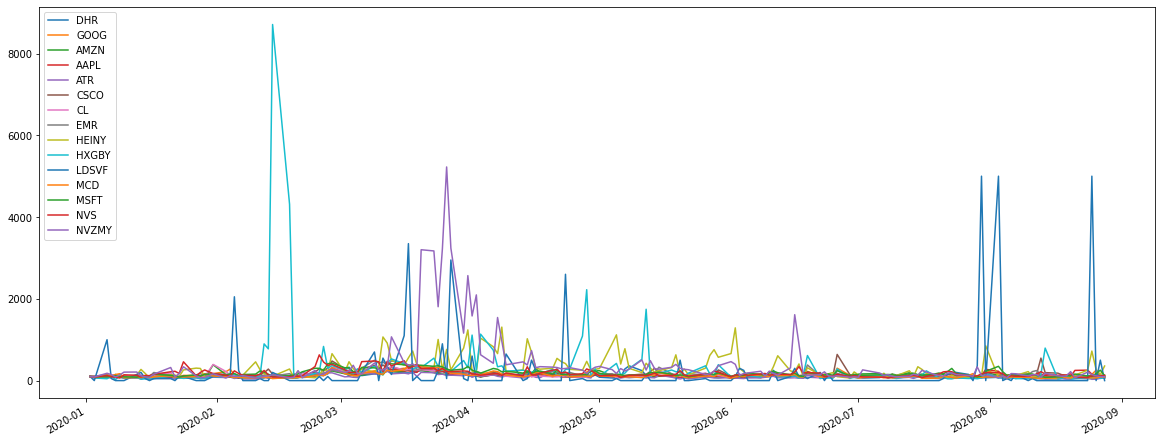

In [13]:
pf_vol.iloc[0]
(pf_vol / pf_vol.iloc[0] * 100).plot(figsize=(20, 8))

plt.legend(loc=2);

**Bonus: What happened that day? **

In [ ]:
#rewrite retrieve

In [20]:
pf_vol.max()

    

DHR        9313537.0
GOOG       4267698.0
AMZN      15567283.0
AAPL     106721230.0
ATR         924200.0
CSCO     106928267.0
CL        13591500.0
EMR       12610503.0
HEINY       338467.0
HXGBY       942309.0
LDSVF          100.0
MCD       13693642.0
MSFT      97073557.0
NVS        7630856.0
NVZMY       555848.0
dtype: float64

In [21]:
pf_vol.idxmax()

DHR     2020-05-08
GOOG    2020-06-26
AMZN    2020-01-31
AAPL    2020-02-28
ATR     2020-06-26
CSCO    2020-06-26
CL      2020-01-31
EMR     2020-03-09
HEINY   2020-04-08
HXGBY   2020-02-14
LDSVF   2020-07-30
MCD     2020-03-17
MSFT    2020-02-28
NVS     2020-02-25
NVZMY   2020-03-26
dtype: datetime64[ns]

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [ ]:
tesla['Total_Traded'] = tesla['open']*tesla['volume']
ford['Total_Traded'] = ford['open']*ford['volume']
gm['Total_Traded'] = gm['open']*gm['volume']

** Plot this "Total Traded" against the time index.**

In [ ]:
tesla['Total_Traded'].plot(label='Tesla',figsize=(16,8), color='steelblue')
ford['Total_Traded'].plot(label='Ford',figsize=(16,8), color='forestgreen')
gm['Total_Traded'].plot(label='GM',figsize=(16,8), color='darkorange')
plt.legend();

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [ ]:
tesla['Total_Traded'].idxmax()

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

In [ ]:
# Code here
gm['MA50']=gm['open'].rolling(window=50).mean()

gm['MA200']=gm['open'].rolling(window=200).mean()
gm[['open','MA50','MA200']].plot(figsize=(16,6));

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [ ]:
from pandas.plotting import scatter_matrix


In [ ]:
car_comp = pd.concat([tesla["open"],gm['open'],ford['open']], axis = 1)

In [ ]:
car_comp.columns = ['Tesla','GM','Ford']

In [ ]:
car_comp.head()

In [ ]:
scatter_matrix(car_comp,figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});
# alpha - it is darker where points overlap

_____
### Bonus Visualization Task! (Note: This is hard!)
**Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

In [ ]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import Dateformatter, date2num,WeekdayLocator, DayLocator, MONDAY

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [ ]:
tesla['returns'] = (tesla['close']/tesla['close'].shift(1))-1
tesla.head()

In [ ]:
tesla['returns']=tesla['close'].pct_change(1)
tesla.head()
gm['returns']=gm['close'].pct_change(1)
ford['returns']=ford['close'].pct_change(1)

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

In [ ]:
ford['returns'].hist(bins=50, figsize=(10,8), alpha=0.4, color='forestgreen')
tesla['returns'].hist(bins=50, figsize=(10,8), alpha=0.4, color='steelblue')
gm['returns'].hist(bins=50, figsize=(10,8), alpha=0.2, color='darkorange');

In [ ]:
ford['returns'].plot(kind='kde', figsize=(10,8), label='Ford', color='forestgreen')
tesla['returns'].plot(kind='kde', figsize=(10,8), label='Tesla', color='steelblue')
gm['returns'].plot(kind='kde', figsize=(10,8), label='GM', color='darkorange');
plt.legend();

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

In [ ]:
df_returns= pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
df_returns.columns = ['Tesla', 'Ford', 'GM']
df_returns.plot(kind='box', figsize=(8,11))

** Try also creating some box plots comparing the returns. **

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

In [ ]:
pd.plotting.scatter_matrix(df_returns, figsize=(8,8), alpha= 0.2,hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

In [ ]:
df_returns.plot(kind='scatter', x='Ford', y='GM', alpha=0.5, figsize=(10,8))

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [ ]:

tesla['returns']
(1+tesla['returns'])
(1+tesla['returns']).cumprod()

In [ ]:
tesla['cumRet']=(1+tesla['returns']).cumprod()
tesla.head(10)
gm['cumRet']=(1+gm['returns']).cumprod()
ford['cumRet']=(1+ford['returns']).cumprod()

In [ ]:
tesla['cumRet'].plot(label='Tesla', figsize=(16,8))

gm['cumRet'].plot(label='gm', figsize=(16,8))
ford['cumRet'].plot(label='Ford', figsize=(16,8));

In [ ]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [ ]:


df_returns.head()
(df_returns / df_returns.iloc[1] * 100).plot(figsize=(10,5), alpha=0.25)

In [ ]:
gm['cumRet'].plot(label='gm', figsize=(16,8))
ford['cumRet'].plot(label='Ford', figsize=(16,8));
plt.legend();


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!

In [ ]:
import myalpha_util as myau
import myalpha 
import os
import pandas as pd

In [ ]:

api_key_alpha = myalpha.secret['api_key_alpha']
function='TIME_SERIES_DAILY_ADJUSTED'
symbol_list=['AAPL', 'AMZN', 'CSCO', 'MSFT']

myau.get_alphav_10symbols(symbol_list,api_key_alpha,function)
        

#  Sharpe RATIO

In [ ]:
import myalpha_util as myau
symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)


In [ ]:
aapl.iloc[0]['adjusted_close']

In [ ]:
# cumulative returns:
for stock in (aapl, csco, amzn, msft):
    stock['cum_return'] = stock['adjusted_close'] / stock.iloc[0]['adjusted_close']

    

In [ ]:
aapl.head()

In [ ]:
aapl.tail()

In [ ]:
# a list of tuples (first element is the dataframe of the stock and second element is 0.3)
list(zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]))

In [ ]:
# allocation to portfolio
# 30% aapl
# 20% amzn
# 40% csco
# 10% msft

for stock, weight in zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]):
    stock['weight'] = stock['cum_return']*weight
    
    




In [ ]:
aapl.head()
# 30% of my money is in apple so this is my cum return portfolio wise

In [ ]:
#investing 1Mio $ - calculate the position value of each stock according to its weight in the portfolio
for stock in (aapl, csco, amzn, msft):
    stock['pos_value'] = stock['weight']*1000000
    
    

In [ ]:
aapl.head()

In [ ]:
all_pos_vals = [aapl['pos_value'], csco['pos_value'], amzn['pos_value'], msft['pos_value']]
#all_pos_vals
pf = pd.concat(all_pos_vals, axis = 1)
pf.columns = ['aapl', 'csco', 'amzn', 'msft']
pf.head()

In [ ]:
# total position
pf['total_pos']=pf.sum(axis=1)
pf.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
pf['total_pos'].plot(figsize=(10,8))
plt.title('total portfolio value ');

In [ ]:
pf.drop('total_pos', axis = 1).plot(figsize=(10,8));

In [ ]:
pf['daily_return']= pf['total_pos'].pct_change(1)
pf.head()

In [ ]:
pf['daily_return'].std()

In [ ]:
pf['daily_return'].mean()

In [ ]:
pf['daily_return'].plot(kind='kde', figsize=(4,5))

In [ ]:
cum_return = 100 * ((pf['total_pos'][-1] - pf['total_pos'][0])/pf['total_pos'][0] )
cum_return

In [ ]:
pf['total_pos'][-1]

In [ ]:
#calculate sharpe ratio assume risk-free rate to be zero
sr = pf['daily_return'].mean() / pf['daily_return'].std()
sr

In [ ]:
# annualize thi sr 
# asr should be above 1 

asr = (252**0.5)*sr
asr

# portfolio optimization
# - monte carlo
# - mathematical optimization by minimizing the negative sharpe ratio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    

In [ ]:
import myalpha_util as myau
symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol) 

In [ ]:
pf = pd.concat([aapl['adjusted_close'],csco['adjusted_close'],amzn['adjusted_close'], msft['adjusted_close']], axis=1)

pf.columns = ['aapl', 'csco', 'amzn', 'msft']

pf.head()

In [ ]:
#calculate annual mean of returns as % 
pf.pct_change(1).mean()*252

In [ ]:
pf.pct_change(1).corr()

In [ ]:
# we use log returns for algorithms especially for normalizations
log_ret= np.log(pf/pf.shift(1))

log_ret.head()


In [ ]:
log_ret.hist(bins=100, figsize=(12,8));

In [ ]:
log_ret.mean()

In [ ]:
log_ret.var()*252
#log_ret.std()*252**0.5

In [ ]:
log_ret.cov() * 252

In [ ]:
np.random.seed(101)
# to keep getting the same random weights

print(pf.columns)
weights = np.array(np.random.random(4))
print(weights)
# but they do not add up to 1

print('rebalance')
weights=weights/np.sum(weights)
print(weights)
np.sum(weights)


In [ ]:
print('expected portfolio return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print((log_ret.mean() * weights) * 252)
exp_ret
print(exp_ret)
print('\n expected volatility')
#denominator of sharp-ratio

exp_vol = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

sr = exp_ret / exp_vol
print('\n sharpe ratio: ')
print(sr)


In [ ]:
import numpy as np
np.random.seed(101)
num_pf = 5000
all_weights = np.zeros((num_pf, len(pf.columns)))
ret_arr = np.zeros(num_pf)
vol_arr = np.zeros(num_pf)
sharpe_arr = np.zeros(num_pf)

for ind in range(num_pf):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    # expected return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
    #sharpe ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    
print('done')





In [ ]:
print(sharpe_arr.max())
sharpe_arr


In [ ]:
sharpe_arr.argmax()

In [ ]:
print(sharpe_arr[2936])
all_weights[2936,:]

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
plt.scatter(max_sr_vol, max_sr_ret,  c='red')
           


# using ML approach

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)  * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

            

In [ ]:
from scipy.optimize import minimize 
import numpy as np


In [ ]:
#helper function
#minimize negative sharpe ratio which is the same as maximize sr
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [ ]:
log_ret.head()

In [ ]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1


In [ ]:
cons = ({'type': 'eq', 'fun':check_sum})
#defines a constraingt for minimize function - it says
# type will be equations and a function

In [ ]:
bounds = ((0,1),(0,1), (0,1),(0,1))
#sum of weights is 1 
init_guess = [0.25,0.25,0.25,0.25]

In [ ]:
#opt_results = minimize(neg_sharpe, )
help(minimize)


In [ ]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds,constraints=cons )
opt_results

In [ ]:
if (np.sum(opt_results.x)) == 1:
    print("ok")

get_ret_vol_sr(opt_results.x)


In [ ]:
# create an array of possible returns  y-values
frontier_y = np.linspace(0,0.3,100)
frontier_y

    

In [ ]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_volatility = []
#for a possible return what is the risk
#in order to get the return/volatility combinations on the efficient frontier 
#we add the second constraint
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: (get_ret_vol_sr(w)[0]-possible_return)})
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_volatility.append(result['fun'])
    
    
frontier_volatility
    

In [ ]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

max_sr_ret_calc = frontier_y[frontier_sr.argmax()]
max_sr_vol_calc = frontier_volatility[frontier_sr.argmax()]
print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])

In [ ]:
# calculated efficient frontier
plt.figure(figsize=(12,8))
plt.plot(frontier_volatility,frontier_y, 'g--');

#scatter-plot from monte carlo simulation
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='black');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');

max_sr_ret = max_sr_ret_calc
max_sr_vol = max_sr_vol_calc
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='red');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');
        

In [ ]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])
